### 1. Download the dataset

#### Import libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

### 2. Load the dataset into the tool

In [123]:
df=pd.read_csv('Mall_Customers.csv')

In [124]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [125]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3. Perform Below Visualizations

* Univariate Analysis

Text(0.5, 0, 'Age')

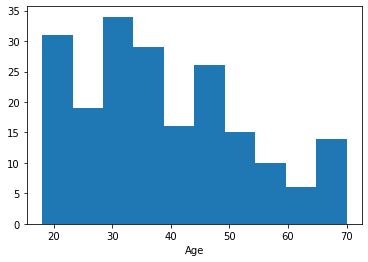

In [127]:
plt.hist(df['Age'])
plt.xlabel('Age')

Text(0.5, 0, 'Annual Income')

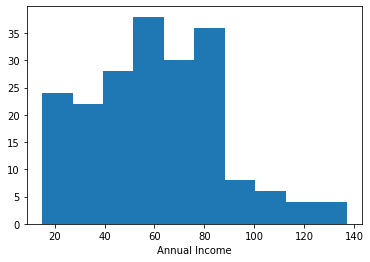

In [131]:
plt.hist(df['Annual Income (k$)'])
plt.xlabel('Annual Income')

* Bivariate Analysis

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

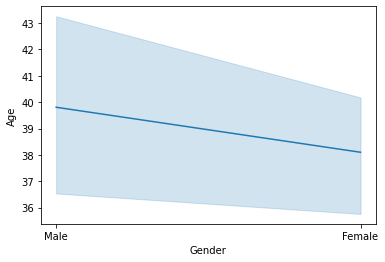

In [135]:
sns.lineplot(df['Gender'],df['Age'])

**∙ Multi-Variate Analysis**

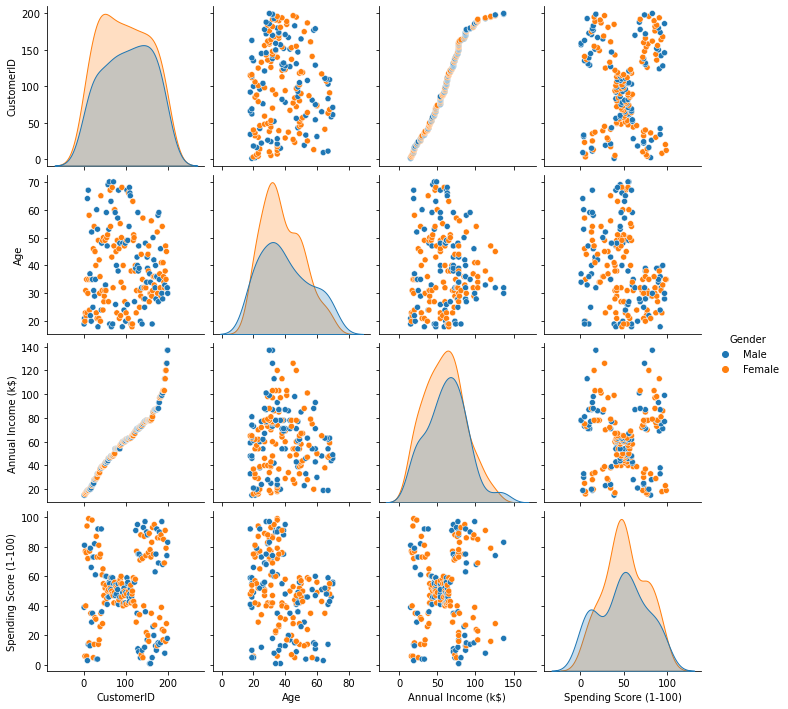

In [141]:
sns.pairplot(df,hue='Gender')

### 4. Perform descriptive statistics on the dataset

In [142]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [143]:
df.median()

C:\Users\shafi\AppData\Local\Temp\ipykernel_10592\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

### 5. Handling Missing values

In [146]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 6. Find the outliers and replace them outliers

<AxesSubplot:xlabel='Spending Score (1-100)'>

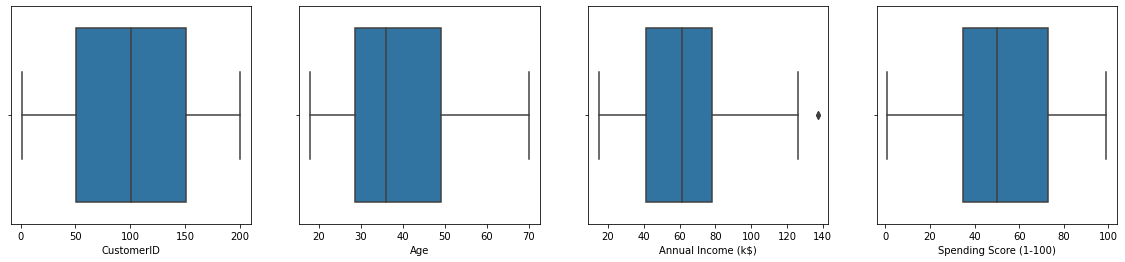

In [145]:
fig,ax = plt.subplots(figsize=(25,4))

plt.subplot(1,5,1)
sns.boxplot(x=df["CustomerID"])

plt.subplot(1,5,2)
sns.boxplot(x=df["Age"])

plt.subplot(1,5,3)
sns.boxplot(x=df["Annual Income (k$)"])

plt.subplot(1,5,4)
sns.boxplot(x=df["Spending Score (1-100)"])

In [39]:
qnt=df.quantile(q=[0.25,0.75])
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [41]:
iqr=qnt.loc[0.75]-qnt.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [150]:
lower=qnt.loc[0.25]-(1.5*iqr)
lower

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [151]:
upper=qnt.loc[0.75]+(1.5*iqr)
upper

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [152]:
df.mean()

C:\Users\shafi\AppData\Local\Temp\ipykernel_10592\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [53]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>132.750,-13.250,df['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)'>

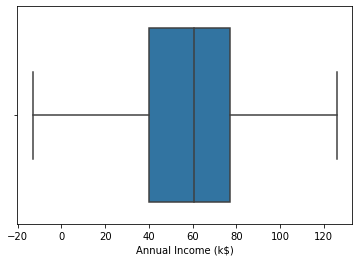

In [54]:
sns.boxplot(x=df['Annual Income (k$)'])

### 7. Check for Categorical columns and perform encoding

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [153]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [154]:
df['Gender'].replace({'Male':1, 'Female':0},inplace=True)

In [155]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### 8. Scaling the data

In [156]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [157]:
data=sc.fit_transform(df.iloc[:,1:])
data

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

### 9. Perform any of the clustering algorithms

#### K-Means Clustering

In [158]:
from sklearn.cluster import KMeans

In [159]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [160]:
TWSS

[37.27227241211876,
 29.552857611943857,
 22.390960011928552,
 19.06284091969291,
 16.4156709816699,
 14.204916470576654,
 12.346125452739162]

Text(0, 0.5, 'TWSS')

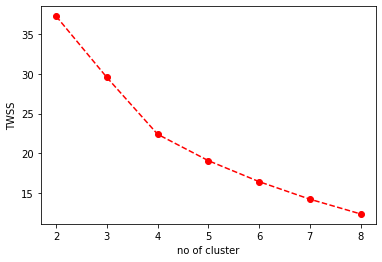

In [161]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [164]:
model=KMeans(n_clusters=4)
model.fit(data)

KMeans(n_clusters=4)

In [165]:
mb=pd.Series(model.labels_)

In [166]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


### 10. Add the cluster data with the primary dataset

In [167]:
df['clust']=mb

In [168]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,3
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [169]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,0,35,120,79,0
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,2
199,200,1,30,137,83,1


### 11. Split the data into dependent and independent variables

In [98]:
x=df.drop(columns=['CustomerID', 'clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [170]:
y=df['clust']
y

0      1
1      1
2      3
3      0
4      0
      ..
195    0
196    3
197    1
198    2
199    1
Name: clust, Length: 200, dtype: int32

### 12. Split the data into training and testing

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### 13. Build the Model

In [172]:
rf=RandomForestClassifier()

### 14. Train the Model

In [173]:
rf.fit(x_train,y_train)

RandomForestClassifier()

### 15. Test the Model

In [174]:
pred=rf.predict(x_test)

### 16. Measure the performance using Evaluation Metrics

In [175]:
accuracy_score(y_test,pred)

1.0

In [176]:
metrics.confusion_matrix(y_test,pred)

array([[ 9,  0,  0,  0],
       [ 0, 14,  0,  0],
       [ 0,  0,  5,  0],
       [ 0,  0,  0, 12]], dtype=int64)